In [8]:
import torch.nn as nn
import torch.nn.functional as F
import glob

In [14]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import os

In [15]:
def findFiles(path):
    return glob.glob(path)

In [16]:
print(findFiles('/Users/simonyanaleksandr/Downloads/data/names/*.txt'))

['/Users/simonyanaleksandr/Downloads/data/names/Czech.txt', '/Users/simonyanaleksandr/Downloads/data/names/German.txt', '/Users/simonyanaleksandr/Downloads/data/names/Arabic.txt', '/Users/simonyanaleksandr/Downloads/data/names/Japanese.txt', '/Users/simonyanaleksandr/Downloads/data/names/Chinese.txt', '/Users/simonyanaleksandr/Downloads/data/names/Vietnamese.txt', '/Users/simonyanaleksandr/Downloads/data/names/Russian.txt', '/Users/simonyanaleksandr/Downloads/data/names/French.txt', '/Users/simonyanaleksandr/Downloads/data/names/Irish.txt', '/Users/simonyanaleksandr/Downloads/data/names/English.txt', '/Users/simonyanaleksandr/Downloads/data/names/Spanish.txt', '/Users/simonyanaleksandr/Downloads/data/names/Greek.txt', '/Users/simonyanaleksandr/Downloads/data/names/Italian.txt', '/Users/simonyanaleksandr/Downloads/data/names/Portuguese.txt', '/Users/simonyanaleksandr/Downloads/data/names/Scottish.txt', '/Users/simonyanaleksandr/Downloads/data/names/Dutch.txt', '/Users/simonyanaleksandr/

In [17]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('/Users/simonyanaleksandr/Downloads/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

Slusarski


In [18]:
n_categories = len(all_categories)

In [19]:
n_categories

18

In [20]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [26]:
print(category_lines['Arabic'])

['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari', 'Maalouf', 'Gerges', 'Naifeh', 'Guirguis', 'Baba', 'Sabbagh', 'Attia', 'Tahan', 'Haddad', 'Aswad', 'Najjar', 'Dagher', 'Maloof', 'Isa', 'Asghar', 'Nader', 'Gaber', 'Abboud', 'Maalouf', 'Zogby', 'Srour', 'Bahar', 'Mustafa', 'Hanania', 'Daher', 'Tuma', 'Nahas', 'Saliba', 'Shamoon', 'Handal', 'Baba', 'Amari', 'Bahar', 'Atiyeh', 'Said', 'Khouri', 'Tahan', 'Baba', 'Mustafa', 'Guirguis', 'Sleiman', 'Seif', 'Dagher', 'Bahar', 'Gaber', 'Harb', 'Seif', 'Asker', 'Nader', 'Antar', 'Awad', 'Srour', 'Shadid', 'Hajjar', 'Hanania', 'Kalb', 'Shadid', 'Bazzi', 'Mustafa', 'Masih', 'Ghanem', 'Haddad', 'Isa', 'Antoun', 'Sarraf', 'Sleiman', 'Dagher', 'Najjar', 'Malouf', 'Nahas', 'Naser', 'Saliba', 'Shamon', 'Malouf', 'Kalb', 'Daher', 'Maalouf', 'Wasem', 'Kanaan', 'Naifeh', 'Boutros', 'Moghadam', 'Masih', 'Sleiman', 'Aswad', 'Cham', 'Assaf', 'Quraishi', 'Shalhoub', 'Sabbag', 'Mifsud', 'Gaber', 'Shammas', 'Tannous', 'Sleiman', 'Bazzi', 'Quraishi', 'Rahal', 'Ch

In [56]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [88]:

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [89]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [90]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8447, -2.8864, -2.8618, -2.9111, -2.8385, -2.9510, -2.9539, -2.8327,
         -2.8085, -2.9270, -2.9659, -2.9262, -2.9272, -2.9454, -2.8221, -2.9166,
         -2.8206, -2.9106]], grad_fn=<LogSoftmaxBackward>)


In [63]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Russian', 6)


In [65]:
import random
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = English / line = Errity
category = Polish / line = Miazga
category = Greek / line = Papadelias
category = English / line = Alpin
category = Chinese / line = Cao
category = Italian / line = Rosa
category = Arabic / line = Samaha
category = Vietnamese / line = Trieu
category = Japanese / line = Yamato
category = Portuguese / line = Rocha


In [66]:
criterion = nn.NLLLoss()

In [ ]:
p.

In [91]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [104]:
line_tensor.size()[0]

3

In [ ]:
line_tensor.size()[0]

In [92]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 6s) 2.8500 Sargent / German ✗ (French)
10000 10% (0m 13s) 3.4365 Ko / Vietnamese ✗ (Japanese)
15000 15% (0m 20s) 1.1977 Quang / Chinese ✗ (Vietnamese)
20000 20% (0m 26s) 0.5144 You / Korean ✓
25000 25% (0m 33s) 2.7430 Roma / Spanish ✗ (Italian)
30000 30% (0m 39s) 3.2737 Klerkx / Polish ✗ (Dutch)
35000 35% (0m 46s) 2.3039 Dargevich / Irish ✗ (Russian)
40000 40% (0m 52s) 1.2542 Phi / Vietnamese ✓
45000 45% (0m 58s) 1.1397 O'Dowd / Irish ✓
50000 50% (1m 5s) 0.3650 Lillis / Greek ✓
55000 55% (1m 11s) 0.8168 Romijnsen / Dutch ✓
60000 60% (1m 18s) 1.5084 Snyder / German ✗ (Dutch)
65000 65% (1m 25s) 0.7437 Ugaki / Japanese ✓
70000 70% (1m 32s) 0.4266 Bach / Vietnamese ✓
75000 75% (1m 39s) 1.6631 Cuevas / Portuguese ✗ (Spanish)
80000 80% (1m 47s) 3.4854 Pittaluga / Spanish ✗ (Italian)
85000 85% (1m 54s) 0.3469 Winther / German ✓
90000 90% (2m 2s) 2.2340 Ojeda / Japanese ✗ (Spanish)
95000 95% (2m 9s) 0.0417 Kalakos / Greek ✓
100000 100% (2m 17s) 0.8338 Sui / Chinese ✓


NameError: name 'ticker' is not defined

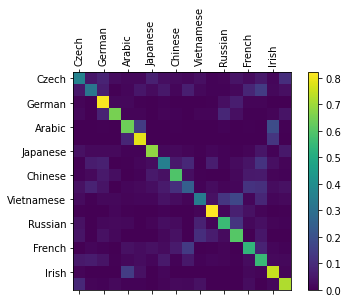

In [73]:
import matplotlib.pyplot as plt
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [72]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.17) Russian
(-2.27) Czech
(-4.10) English

> Jackson
(-0.54) Scottish
(-1.41) English
(-2.69) Russian

> Satoshi
(-1.06) Arabic
(-1.87) Italian
(-2.02) Japanese
